# 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows

In [ ]:
from pydataset import data
df_iris = data('iris')
df_iris
df_iris.head(3)

- print the number of rows and columns (shape)

In [ ]:
df_iris.shape

- print the column names

In [ ]:
df_iris.columns

In [ ]:
for col in df_iris.columns:
    print(col)

- print the data type of each column

In [ ]:
df_iris.dtypes

In [ ]:
df_iris.info()

- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [ ]:
df_iris.describe()

# 5. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

- assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
import pandas as pd

sheet_url = 'https://docs.google.com/spreadsheets/d/1AUpCIpuh_XOMfHEDBolzle3CPqPUtZtUxT57GYTkB9w/edit#gid=1023018493'    
# Please make sure you make the url sharable to everyone
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_excel = pd.read_csv(csv_export_url)
df_excel_sample = df_excel.head(100)
df_excel_sample

- print the number of rows of your original dataframe

In [ ]:
df_excel.shape[0]

- print the first 5 column names

In [ ]:
df_excel.columns[:5]

- print the column names that have a data type of object

In [ ]:
df_excel.info()

In [ ]:
list(df_excel.select_dtypes(['object']).columns)

In [ ]:
df_excel.dtypes[df_excel.dtypes == object]

- compute the range for each of the numeric variables.

In [ ]:
df_excel.is_senior_citizen.max()- df_excel.is_senior_citizen.min()

In [ ]:
df_excel.phone_service.max()- df_excel.phone_service.min()

In [ ]:
df_excel.internet_service.max()- df_excel.internet_service.min()

In [ ]:
df_excel.contract_type.max()- df_excel.contract_type.min()

In [ ]:
df_excel.monthly_charges.max() - df_excel.monthly_charges.min()

In [ ]:
df_excel.total_charges.max() - df_excel.total_charges.min()

In [ ]:
df_excel[df_excel.columns[(df_excel.dtypes == float) | (df_excel.dtypes == int)]].max() - df_excel[df_excel.columns[(df_excel.dtypes == float) | (df_excel.dtypes == int)]].min()

In [ ]:
df_excel.describe()

In [ ]:
# I can select just the true numeric variables to declutter my results.

telco_stats = df_excel[['monthly_charges', 'total_charges']].describe().T
telco_stats

In [ ]:
telco_stats['range'] = telco_stats['max'] - telco_stats['min']
telco_stats

# 6. Read the data from this google sheet into a dataframe, df_google

In [ ]:


import pandas as pd

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    
# This is url localtion for google sheet. Please make sure you make the url sharable to everyone

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
# export url and pull it here

df_google = pd.read_csv(csv_export_url)

df_google


- print the first 3 rows

In [ ]:
df_google.head(3)

- print the number of rows and columns

In [ ]:
df_google.shape

- print the column names

In [ ]:
df_google.columns.to_list()

- print the data type of each column

In [ ]:
df_google.dtypes

- print the summary statistics for each of the numeric variables

In [ ]:
df_google.describe().T

- print the unique values for each of your categorical variables

In [ ]:
# I could get a count of unique values for each variable with an object data type.

for col in df_google.columns:
#     print(col)
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

In [ ]:
df_google.Survived.value_counts(dropna=False)

In [ ]:
df_google.Pclass.value_counts(dropna=False)

In [ ]:
df_google.Sex.value_counts(dropna=False)

In [ ]:
df_google.Embarked.value_counts(dropna=False)

# Exercises

# The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

# This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.


# Using the Iris Data:

# 1. Use the function defined in acquire.py to load the iris data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire

from pydataset import data

import os

# Remove limits on viewing dataframes

pd.set_option('display.max_columns', None)


In [ ]:
df_iris = acquire.get_iris_data()
df_iris.head()

# 2. Drop the species_id and measurement_id columns.

In [ ]:
df_iris = df_iris.drop(columns = ['species_id']) # There is no measurement_id columns


In [ ]:
df_iris.head()

# 3. Rename the species_name column to just species.

In [ ]:
df_iris = df_iris.rename(columns = {'species_name':'species'})
df_iris.head()

# 4. Create dummy variables of the species name and concatenate onto the iris dataframe.

In [ ]:
df_iris_dummies =  pd.get_dummies(df_iris[['species']], dummy_na = False, drop_first = [True])
df_iris_dummies.head()

In [ ]:
df_iris = pd.concat([df_iris, df_iris_dummies], axis=1)
df_iris = df_iris.drop(columns = ['species'])
df_iris.head()

# 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def prep_iris(df_iris):
    # drop and rename columns
    df_iris = df_iris.drop(columns = 'species_id').rename(columns = {'species_name':'species'})
    
    # Create dummy columns for species
    df_iris_dummies =  pd.get_dummies(df_iris[['species']], dummy_na = False, drop_first = [True])
    
    
    # add dummy columns to df_iris
    df_iris = pd.concat([df_iris, df_iris_dummies], axis=1)
    
    return df_iris
    

In [ ]:
df_iris = acquire.new_iris_data()
df_iris = prep_iris(df_iris)
df_iris.head()

# Using the Titanic dataset

# 1. Use the function defined in acquire.py to load the Titanic data.

In [ ]:
# Loading Titanic data using acquire.py  defined in acquisition exercise
df_titanic = acquire.get_titanic_data()
# viewing first 5 rows
df_titanic.head()

In [ ]:
# Rows and Columns
df_titanic.shape

In [ ]:
# Getting information about the dataframe
df_titanic.info()

In [ ]:
# Getting summary statistics from numeric columns
df_titanic.describe()

In [ ]:
# Checking out distributions of numeric columns
plt.hist(df_titanic['survived'])

In [ ]:
num_cols = df_titanic.columns[[df_titanic[col].dtype == 'int64' for col in df_titanic.columns]]
num_cols

In [ ]:
for col in num_cols:
    plt.hist(df_titanic[col])
    plt.title(col)
    plt.show()
    plt.boxplot(df_titanic[col])
    plt.title(col)
    plt.show()

In [ ]:
# Use .describe with object columns
obj_cols = df_titanic.columns[[df_titanic[col].dtype == 'O' for col in df_titanic.columns]]
obj_cols

In [ ]:
for col in obj_cols:
    print(df_titanic[col].value_counts())
    print(df_titanic[col].value_counts(normalize = True, dropna = False))
    print('------------------------------')

In [ ]:
# Create bins for fare using .value_counts.
# Using sort = false will sort by bin values as opposed to the frequency counts.
df_titanic.fare.value_counts(bins = 5, sort = False)

In [ ]:
# Find columns with missing values and the total of missing values.
missing = df_titanic.isnull().sum()
missing[missing >0]

# Step 2: Cleaning Data

# 2. Drop any unnecessary, unhelpful, or duplicated columns.

In [ ]:
# Drop duplicates... run just in case; reassign and check the shape of my data
print(df_titanic.shape)
df_titanic = df_titanic.drop_duplicates()
print(df_titanic.shape)

### Missing Data?

In [ ]:
# Drop columns with too many missing values for now and reassign; check the shape of my data.
cols_to_drop = ['deck', 'embarked', 'class', 'age']
df_titanic = df_titanic.drop(columns=cols_to_drop)
df_titanic.shape

In [ ]:
# Validate that the columns are dropped.
df_titanic.head()

We could fill embark_town with most common value, 'Southampton', by hard-coding the value using the fillna() function, as below. Or we could use an imputer. We will demonstrate the imputer after the train-validate-test split.

In [ ]:
# Run .fillna() on the entire df_titanic.
df_titanic['embark_town'] = df_titanic.embark_town.fillna(value='Southampton')

In [ ]:
# Validate that missing values in embark_town have been handled.
df_titanic.embark_town.isna().sum()

### Outliers?
There are a few outliers potentially in sibsp, parch, but without specific domain knowledge related to the titanic, I am not going to remove those outliers or snap them/compress them, I will ignore them for now.

Erroneous Values?
No erroneous values detected.

### Correct Datatypes?

In [ ]:
df_titanic.dtypes

### Text Normalization?
No text normalization issues detected.


### Tidy Data?

In [ ]:
# Each column should only represent one variable
# Each row should be one observation (passenger)
df_titanic.head()

# 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

### Create New Variables?

Get dummy vars for sex and embark_town

dummy_na: create a dummy var for na values, also? drop_first: drop first dummy var (since we know if they do not belong to any of the vars listed, then they must belong to the first one that is not listed).

In [ ]:
dummy_df_titanic = pd.get_dummies(df_titanic[['sex', 'embark_town']], dummy_na=False, drop_first=[True])
dummy_df_titanic

In [ ]:
# Concatenate the dummy_df dataframe above with the original df and validate.
df_titanic = pd.concat([df_titanic, dummy_df_titanic], axis=1)
df_titanic.head()

### Rename Columns?
No renaming needed at this time.

### Scaling Data?

In [ ]:
# You want to scale data when you're using methods based on measures
# of how far apart data points, like support vector machines
# or k-nearest neighbors.

### Lets not do that all over again repeatedly...lets make a function

In [ ]:
def clean_data(df):
    '''
    This function will clean the data...
    '''
    df = df.drop_duplicates()
    cols_to_drop = ['deck', 'embarked', 'class', 'age']
    df = df.drop(columns=cols_to_drop)
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    return df

### Testing that the function does what we intend for it to do:

In [ ]:
df_titanic = acquire.get_titanic_data()
df_titanic.head()

In [ ]:
df_titanic = clean_data(df_titanic)
df_titanic.head()

In [ ]:
df_titanic.info()

# Step 3: Splitting

In [ ]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 
train, test = train_test_split(df_titanic, test_size = .2, random_state=123, stratify=df_titanic.survived)

In [ ]:
print(train.shape)
print(test.shape)

In [ ]:
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

In [ ]:
# Observe split
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

# Turn it into a function

In [ ]:
def split_data(df):
    '''
    Takes in a dataframe and return train, validate, test subset dataframes
    '''
    train, test = train_test_split(df, test_size = .2, random_state=123, stratify=df.survived)
    train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)
    return train, validate, test

### Testing that the function is doing what we intend for it to do:

In [ ]:
df_titanic.shape

In [ ]:
train, validate, test = split_data(df_titanic)
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

### Alternative Method: Impute

We can impute values using the mean, median, mode (most frequent), or a constant value. We will use sklearn.imputer.SimpleImputer to do this.

Create the imputer object, selecting the strategy used to impute (mean, median or mode (strategy = 'most_frequent').
Fit to train. This means compute the mean, median, or most_frequent (i.e. mode) for each of the columns that will be imputed. Store that value in the imputer object.
Transform train: fill missing values in train dataset with the stored value
Transform validate: fill missing values in validate dataset with the stored value
Transform test: fill missing values in test dataset with the stored value

In [ ]:
# Get fresh Titanic data to use with missing values in embark_town again.
df = acquire.get_titanic_data()
train, validate, test = split_data(df)

In [ ]:
# ONLY look at train dataset after we split our data.
train.info()

Create the SimpleImputer object, which we will store in the variable imputer. In the creation of the object, we will specify the strategy to use (mean, median, most_frequent). Essentially, this is creating the instructions and assigning them to a variable, imputer.

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

Fit the imputer to the columns in the training df. This means that the imputer will determine the most_frequent value, or other value depending on the strategy called, for each column.

In [ ]:
imputer = imputer.fit(train[['embark_town']])

It will store that value in the imputer object to use upon calling transform. We will call transform on our train, validate, and test datasets to fill any missing values

In [ ]:
train[['embark_town']] = imputer.transform(train[['embark_town']])

validate[['embark_town']] = imputer.transform(validate[['embark_town']])

test[['embark_town']] = imputer.transform(test[['embark_town']])

In [ ]:
# Validate that there are no longer any Null values in embark_town.
print(train.embark_town.value_counts(dropna=False))
print(validate.embark_town.value_counts(dropna=False))
print(test.embark_town.value_counts(dropna=False))

### Simplify our life with a function

Note: the clean_data() function is already dealing with missing values. If we want to use imputation, we will need to go back and tweak our earlier function.

In [ ]:
# Yay functions!
def impute_mode(train, validate, test):
    '''
    Takes in train, validate, and test, and uses train to identify the best value to replace nulls in embark_town
    Imputes that value into all three sets and returns all three sets
    '''
    imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
    train[['embark_town']] = imputer.fit_transform(train[['embark_town']])
    validate[['embark_town']] = imputer.transform(validate[['embark_town']])
    test[['embark_town']] = imputer.transform(test[['embark_town']])
    return train, validate, test

# 4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

### We can create a function made of our other functions

In [ ]:
def prep_titanic_data(df):
    '''
    The ultimate dishwasher
    '''
    df = clean_data(df)
    train, validate, test = split_data(df)
    return train, validate, test

In [ ]:
# Acquire fresh Titanic data to test my funtion.
df_titanic = acquire.get_titanic_data()
df_titanic

In [ ]:
# Run final prepare function and validate what that the function is working properly.
prep_titanic_data(df_titanic)

In [ ]:
print(f'{train.shape}')
print(f'{validate.shape}')
print(f'{test.shape}')

# Using the Telco dataset

# 1. Use the function defined in acquire.py to load the Telco data.

In [ ]:
df_telco = acquire.get_telco_data()
df_telco.head()

In [ ]:
df_telco.info()

In [ ]:
df_telco.shape

In [ ]:
missing1 = df_telco.isnull().sum()
missing1[missing1 > 0]

# 2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [ ]:
# droping duplicates and unnecessary, unhelpful columns
print(df_telco.shape)
df_telco = df_telco.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'])
print(df_telco.shape)

In [ ]:
 # Drop null values stored as whitespace
df_telco['total_charges'] = df_telco['total_charges'].str.strip()
df_telco = df_telco[df_telco.total_charges != '']
print(df_telco.shape)

In [ ]:
# Convert to correct datatype
df_telco['total_charges'] = df_telco.total_charges.astype(float)

In [ ]:
df_telco.info()

# 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
 # Convert binary categorical variables to numeric
df_telco['gender_encoded'] = df_telco.gender.map({'Female': 1, 'Male': 0})
df_telco['partner_encoded'] = df_telco.partner.map({'Yes': 1, 'No': 0})
df_telco['dependents_encoded'] = df_telco.dependents.map({'Yes': 1, 'No': 0})
df_telco['phone_service_encoded'] = df_telco.phone_service.map({'Yes': 1, 'No': 0})
df_telco['paperless_billing_encoded'] = df_telco.paperless_billing.map({'Yes': 1, 'No': 0})
df_telco['churn_encoded'] = df_telco.churn.map({'Yes': 1, 'No': 0})

In [ ]:
df_telco.head()

In [ ]:
# Get dummies for non-binary categorical variables
dummy_df_telco = pd.get_dummies(df_telco[['multiple_lines',
                              'online_security',
                                  'online_backup',
                                  'device_protection',
                                  'tech_support',
                                  'streaming_tv',
                                  'streaming_movies',
                                  'contract_type',
                                  'internet_service_type',
                                  'payment_type']], dummy_na=False,
                              drop_first=True)
dummy_df_telco.head()

In [ ]:
# Concatenate dummy dataframe to original
df_telco = pd.concat([df_telco, dummy_df_telco], axis=1)

In [ ]:
df_telco.head()

In [ ]:
def split_telco_data(df):
    '''
    This function performs split on telco data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2,
                                            random_state=123,
                                            stratify=df.churn)
    train, validate = train_test_split(train_validate, test_size=.2,
                                       random_state=123,
                                       stratify=train_validate.churn)
    return train, validate, test


In [ ]:
# split the data
train, validate, test = split_telco_data(df_telco)

# 4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [ ]:
def prep_telco_data(df):
    # Drop duplicate columns
    df.drop(columns=['payment_type_id', 'internet_service_type_id',
            'contract_type_id', 'customer_id'], inplace=True)

    # Drop null values stored as whitespace
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges != '']

    # Convert to correct datatype
    df['total_charges'] = df.total_charges.astype(float)

    # Convert binary categorical variables to numeric
    df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
    df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
    df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
    df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
    df['paperless_billing_encoded'] = df.paperless_billing.map(
        {'Yes': 1, 'No': 0})
    df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})

    # Get dummies for non-binary categorical variables
    dummy_df = pd.get_dummies(df[['multiple_lines',
                              'online_security',
                                  'online_backup',
                                  'device_protection',
                                  'tech_support',
                                  'streaming_tv',
                                  'streaming_movies',
                                  'contract_type',
                                  'internet_service_type',
                                  'payment_type']], dummy_na=False,
                              drop_first=True)

    # Concatenate dummy dataframe to original
    df = pd.concat([df, dummy_df], axis=1)

    # split the data
    train, validate, test = split_telco_data(df)

    return train, validate, test


In [ ]:
# Checking whether function works or not
df_telco = acquire.get_telco_data()
df_telco.head()
prep_telco_data(df_telco)


In [ ]:
print(f'{test.shape}')
print(f'{validate.shape}')
print(f'{train.shape}')


# Exploratory Analysis:

# Exercises

# Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

# Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

# 1. Acquire, prepare & split your data.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

np.random.seed(123)

In [2]:
# Acquiring iris_db from mySQL Server
import env
import acquire
df = acquire.get_iris_data()
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [3]:
# Usefull helper for checking for nulls
# What proportion of each column is empty
df.isna().mean()

species_id      0.0
species_name    0.0
sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
dtype: float64

In [4]:
# droping species_id column
def prep_iris(df):
    df = df.rename(columns = {'species_name': 'species'})
    df = df.drop(columns = ['species_id']) # dropping species_id
    return df

In [5]:
df = prep_iris(df)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       150 non-null    object 
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


Split your data into train, validate, and test samples

In [7]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [9]:
train, validate, test = train_validate_test_split(df, target='species')
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

# 2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       84 non-null     object 
 1   sepal_length  84 non-null     float64
 2   sepal_width   84 non-null     float64
 3   petal_length  84 non-null     float64
 4   petal_width   84 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [11]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width
79,versicolor,5.7,2.6,3.5,1.0
36,setosa,5.5,3.5,1.3,0.2
133,virginica,6.3,2.8,5.1,1.5
95,versicolor,5.7,3.0,4.2,1.2
18,setosa,5.7,3.8,1.7,0.3


In [12]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571
std,0.769099,0.448256,1.734940,0.752577
min,4.400000,2.200000,1.200000,0.100000
25%,5.375000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


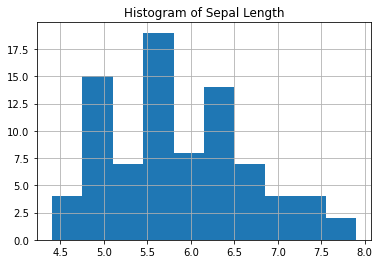

In [13]:
plt.title("Histogram of Sepal Length")
train.sepal_length.hist()
plt.show()

<AxesSubplot:>

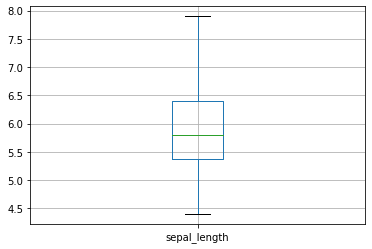

In [14]:
train.boxplot(column = ['sepal_length'])

In [15]:
train.sepal_length.describe()

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

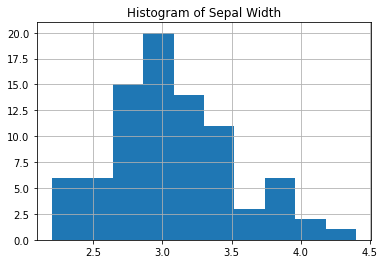

In [16]:
plt.title("Histogram of Sepal Width")
train.sepal_width.hist()
plt.show()

<AxesSubplot:>

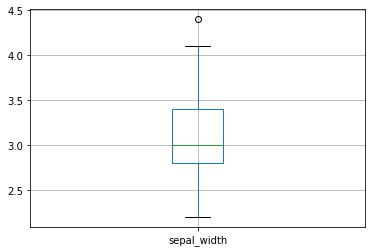

In [17]:
train.boxplot(column = ['sepal_width'])

In [18]:
train.sepal_width.describe()

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64

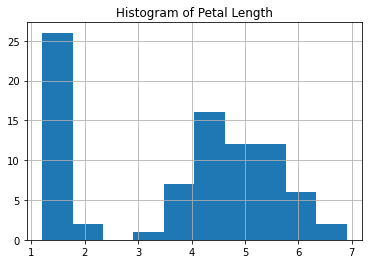

In [19]:
plt.title("Histogram of Petal Length")
train.petal_length.hist()
plt.show()

<AxesSubplot:>

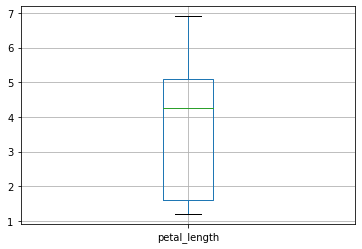

In [20]:
train.boxplot(column = ['petal_length'])

In [21]:
train.petal_length.describe()

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

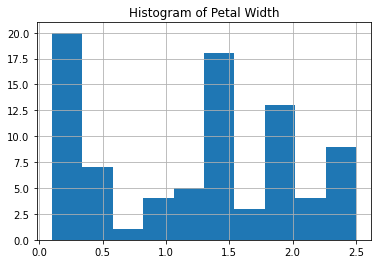

In [22]:
plt.title("Histogram of Petal Width")
train.petal_width.hist()
plt.show()

<AxesSubplot:>

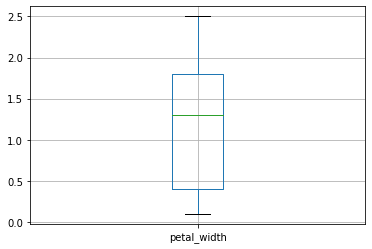

In [23]:
train.boxplot(column = ['petal_width'])

In [24]:
train.petal_width.describe()

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [26]:
train.species.value_counts()

versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64

<AxesSubplot:>

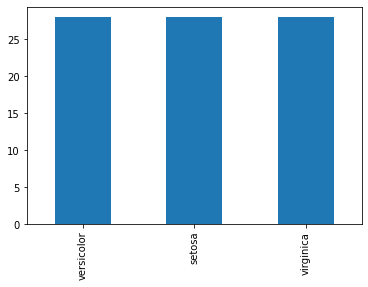

In [27]:
train.species.value_counts().plot.bar()

- Document takeaways & any actions.

# 3. Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

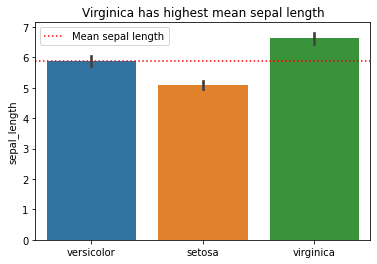

In [28]:
plt.title("Virginica has highest mean sepal length")
sns.barplot(x="species", y="sepal_length", data=train)
mean_sepal_length = train.sepal_length.mean()
plt.axhline(mean_sepal_length, label="Mean sepal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

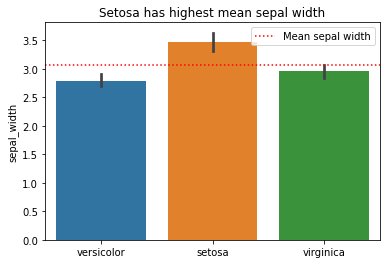

In [29]:
plt.title("Setosa has highest mean sepal width")
sns.barplot(x="species", y="sepal_width", data=train)
mean_sepal_width = train.sepal_width.mean()
plt.axhline(mean_sepal_width, label="Mean sepal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show

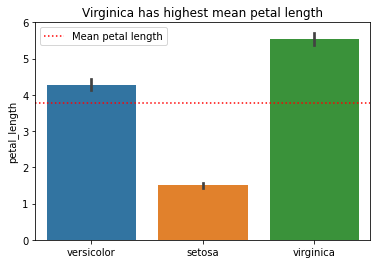

In [30]:
plt.title("Virginica has highest mean petal length")
sns.barplot(x="species", y="petal_length", data=train)
mean_petal_length = train.petal_length.mean()
plt.axhline(mean_petal_length, label="Mean petal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

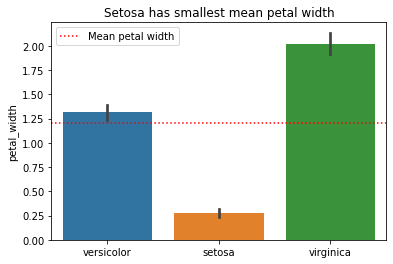

In [31]:
plt.title("Setosa has smallest mean petal width")
sns.barplot(x="species", y="petal_width", data=train)
mean_petal_width = train.petal_width.mean()
plt.axhline(mean_petal_width, label="Mean petal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

In [32]:
# Virginica descriptive statistics
virginica_describe_sl = pd.DataFrame(train[train.species == 'virginica'].sepal_length.describe())
virginica_describe_sw = pd.DataFrame(train[train.species == 'virginica'].sepal_width.describe())
virginica_describe_pl = pd.DataFrame(train[train.species == 'virginica'].petal_length.describe())
virginica_describe_pw = pd.DataFrame(train[train.species == 'virginica'].petal_width.describe())

virginica_describe = pd.concat([virginica_describe_sl, virginica_describe_sw], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pl], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pw], axis=1)
virginica_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.625000,2.960714,5.535714,2.021429
std,0.532378,0.318956,0.496815,0.293582
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.450000,3.000000,5.500000,2.000000
75%,6.900000,3.100000,5.800000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [33]:
# Setosa descriptive statistics
setosa_describe_sl = pd.DataFrame(train[train.species == 'setosa'].sepal_length.describe())
setosa_describe_sw = pd.DataFrame(train[train.species == 'setosa'].sepal_width.describe())
setosa_describe_pl = pd.DataFrame(train[train.species == 'setosa'].petal_length.describe())
setosa_describe_pw = pd.DataFrame(train[train.species == 'setosa'].petal_width.describe())

setosa_describe = pd.concat([setosa_describe_sl, setosa_describe_sw], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pl], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pw], axis=1)
setosa_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.00000
mean,5.089286,3.467857,1.507143,0.27500
std,0.360390,0.427788,0.184448,0.12057
min,4.400000,2.300000,1.200000,0.10000
25%,4.875000,3.275000,1.400000,0.20000
50%,5.000000,3.400000,1.500000,0.20000
75%,5.400000,3.800000,1.600000,0.40000
max,5.800000,4.400000,1.900000,0.60000


In [34]:
# Versicolor descriptive statistics
versicolor_describe_sl = pd.DataFrame(train[train.species == 'versicolor'].sepal_length.describe())
versicolor_describe_sw = pd.DataFrame(train[train.species == 'versicolor'].sepal_width.describe())
versicolor_describe_pl = pd.DataFrame(train[train.species == 'versicolor'].petal_length.describe())
versicolor_describe_pw = pd.DataFrame(train[train.species == 'versicolor'].petal_width.describe())

versicolor_describe = pd.concat([versicolor_describe_sl, versicolor_describe_sw], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pl], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pw], axis=1)
versicolor_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.896429,2.796429,4.271429,1.314286
std,0.425556,0.280848,0.409930,0.199470
min,4.900000,2.300000,3.300000,1.000000
25%,5.600000,2.600000,4.000000,1.200000
50%,5.800000,2.800000,4.250000,1.300000
75%,6.125000,3.000000,4.525000,1.500000
max,6.900000,3.400000,5.100000,1.800000


- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [35]:
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']
setosa = train[train.species == 'setosa']

t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative="greater")
t, p

(767.0, 3.235595834904965e-10)

In [36]:
test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
676.5 1.541014598267054e-06
------------------


Comparing sepal_width between virginica and versicolor
510.0 0.02628629569922847
------------------


Comparing petal_length between virginica and versicolor
776.5 1.4739917857575313e-10
------------------


Comparing petal_width between virginica and versicolor
767.0 3.235595834904965e-10
------------------




- Document takeaways & any actions.

###### petal_length and petal_width show the most seperation between species.
###### Could petal and sepal area be useful features?
###### viginica iris have the largest petals.
###### setosa iris have the smallest petals.
###### setosa seem to have wide & short sepals.

# 4. Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.

In [38]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']

In [39]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
79,versicolor,5.7,2.6,3.5,1.0,14.82,3.50
36,setosa,5.5,3.5,1.3,0.2,19.25,0.26
133,virginica,6.3,2.8,5.1,1.5,17.64,7.65
95,versicolor,5.7,3.0,4.2,1.2,17.10,5.04
18,setosa,5.7,3.8,1.7,0.3,21.66,0.51


In [40]:
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]

In [41]:
combos[0]

('sepal_length', 'sepal_width')

In [42]:
train.groupby('species')['sepal_area'].sum()

species
setosa        497.30
versicolor    463.09
virginica     551.46
Name: sepal_area, dtype: float64

In [43]:
x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

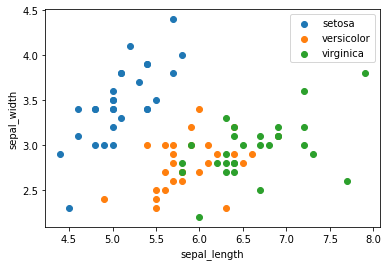

In [44]:
# test it with one plot
scatter_species(x,y)

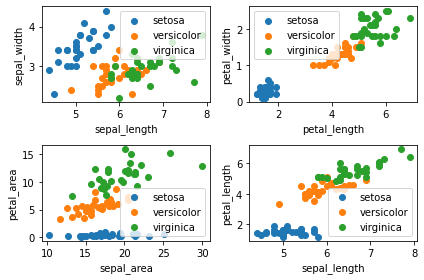

In [45]:
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])
plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])
plt.tight_layout()

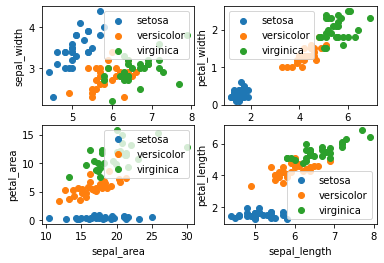

In [46]:
for i, pair in enumerate(combos):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0], pair[1])

###### Takeaways

- sepal_length is useful, sepal_width not great but likely adds some value.
- petal_area is very useful, as we would expect given the previous plot of petal_width x petal length.
- sepal_area is questionable, as we don't see much separation when we look at the 3rd plot in a hortizonal direction. Again, some value in sepal width, but not a ton.
###### A heatmap of each variable layering correlation coefficient on top.

###### n.b. Please do not put a heatmap with all correlation coefficients labeled as is in a presentation! A heatmap can be useful with minimal detail included. Maybe adding extreme values labeled. But not like this! This is for YOUR exploration.

In [48]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.154904,0.867976,0.824691,0.619853,0.860498
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,0.673554,-0.341702
petal_length,0.867976,-0.476228,1.000000,0.957345,0.271618,0.953510
petal_width,0.824691,-0.403306,0.957345,1.000000,0.299920,0.982404
sepal_area,0.619853,0.673554,0.271618,0.299920,1.000000,0.373870
petal_area,0.860498,-0.341702,0.953510,0.982404,0.373870,1.000000


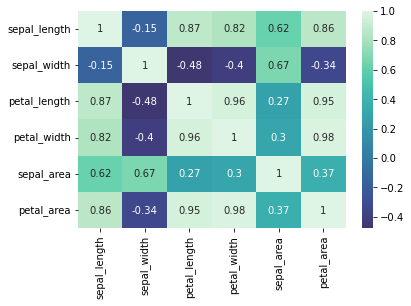

In [49]:
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)
plt.show()

###### Takeaways

- most measures correlate with each other, the least is sepal_width with sepal_lenght @ -.15.

- Negative correlations: Wider sepals => shorter & narrower petals (smaller petal areas)

- Positive correlations: Longer sepals => longer & wider petals (larger petal areas)

- Little to no LINEAR correlation: sepal length & sepal width.

A scatter matrix visualizing the interaction of each variable.

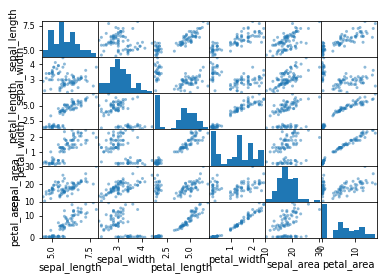

In [51]:
pd.plotting.scatter_matrix(train)
plt.show()

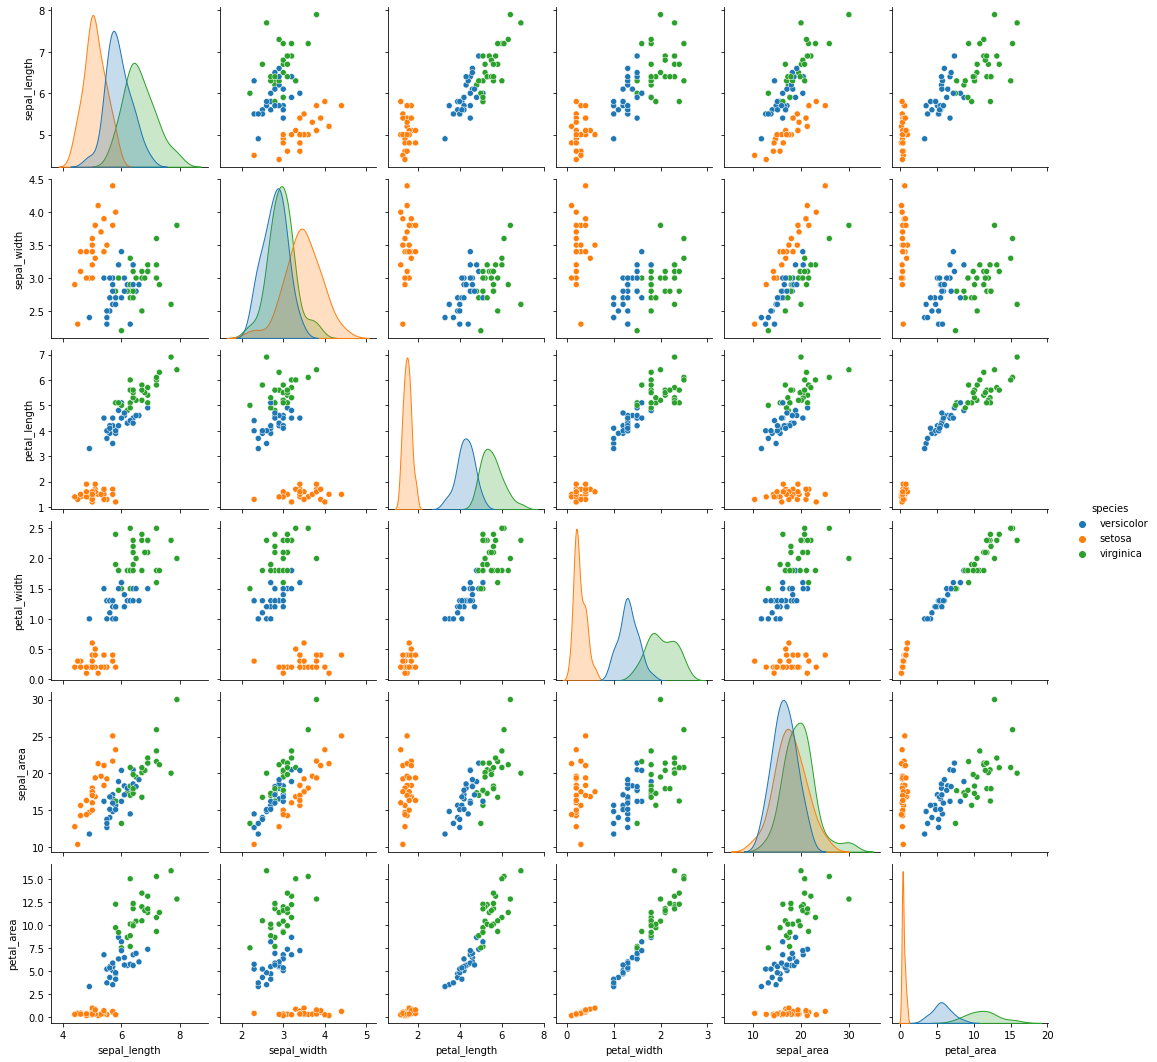

In [52]:
sns.pairplot(train, hue='species')
plt.show()

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       84 non-null     object 
 1   sepal_length  84 non-null     float64
 2   sepal_width   84 non-null     float64
 3   petal_length  84 non-null     float64
 4   petal_width   84 non-null     float64
 5   sepal_area    84 non-null     float64
 6   petal_area    84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 7.3+ KB


###### Takeaways

- petal length + petal width show the most seperation between species.
- setosa has the shortest and narrowest petals. It will be the easiest to determine.
- petal area seems to show the largest separation between virginica & versicolor of all the individual features.
- virginica shows slightly longer sepals, but whether that difference is significant, it's hard to say.
- virginica and versicolor show little to no difference when it comes to the width of the sepals.
###### Hypothesis

alpha = .05

$H_0$: Sepal length is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.

$H_a$: Sepal length significantly different in virginica and versicolor. $\mu_{virginica} =!  \mu_{versicolor}$.

In [54]:
virginica = train[train['species'] == 'virginica']
versicolor = train[train['species'] == 'versicolor']

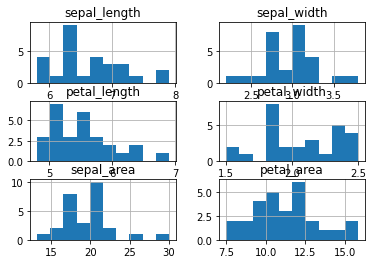

In [55]:
virginica.hist()
plt.show()

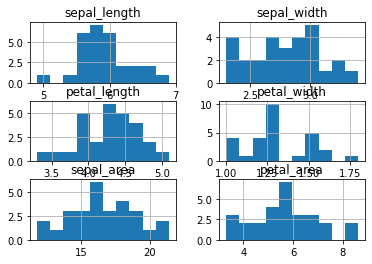

In [56]:
versicolor.hist()
plt.show()

In [57]:
virginica.describe()['sepal_length']['std']

0.5323776159136727

In [58]:
versicolor.describe()['sepal_length']

count    28.000000
mean      5.896429
std       0.425556
min       4.900000
25%       5.600000
50%       5.800000
75%       6.125000
max       6.900000
Name: sepal_length, dtype: float64

In [59]:
import scipy.stats as stats

In [60]:
tstat, p = stats.ttest_ind(virginica.sepal_length,
                versicolor.sepal_length, 
                equal_var=False
               )

In [61]:
tstat, p

(5.656491804882077, 6.856736413800083e-07)

###### Conclusion

We reject $H_0$ that the sepal length is the same for both groups.
Takeaway

Sepal length will be a useful feature.
What about sepal_width? Let's use the Mann-Whitney test for demo purposes.

###### Hypothesis

alpha = .05

$H_0$: Sepal width is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.

$H_a$: Sepal width significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$.

In [62]:
stats.mannwhitneyu(virginica.sepal_width, 
                   versicolor.sepal_width
                  )

MannwhitneyuResult(statistic=510.0, pvalue=0.05257259139845694)

###### Conclusion

We reject $H_0$ that the sepal width is the same!

###### Takeaway

Sepal width, while not the strongest indicator, is still useful.

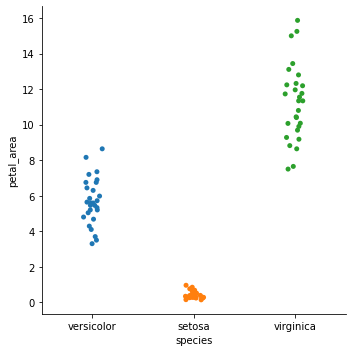

In [63]:
sns.catplot(data=train, x='species', y='petal_area', kind='strip')

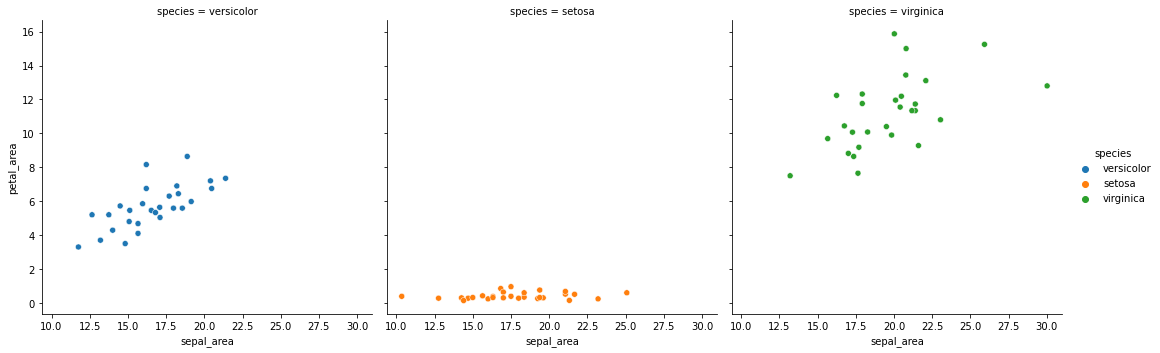

In [64]:
sns.relplot(data=train, x='sepal_area', y='petal_area', kind='scatter', hue='species', col='species')

# Exercises Part II  Solution (Curriculum)
https://github.com/rajaramgautam/classification-exercises/blob/main/exploratory_data_analysis_curriculum.ipynb

# Exercises Part II

- Explore your titanic dataset more completely.

- Determine drivers of the target variable

- Determine if certain columns should be dropped

- Determine if it would be valuable to bin some numeric columns

- Determine if it would be valuable to combine multiple columns into one.

# Does it make sense to combine any features?

# Do you find any surprises?

# Document any and all findings and takeaways in your notebook using markdown.

# Exercises Part III

- Explore your telco data to discover drivers of churn

- Determine if certain columns should be dropped

- Determine if it would be valuable to bin some numeric columns

 - Determine if it would be valuable to combine multiple columns into one.

# What are your drivers of churn?

# Does it make sense to combine any features?

# Do you find any surprises?

# Document any and all findings and takeaways in your notebook using markdown.